Question 1

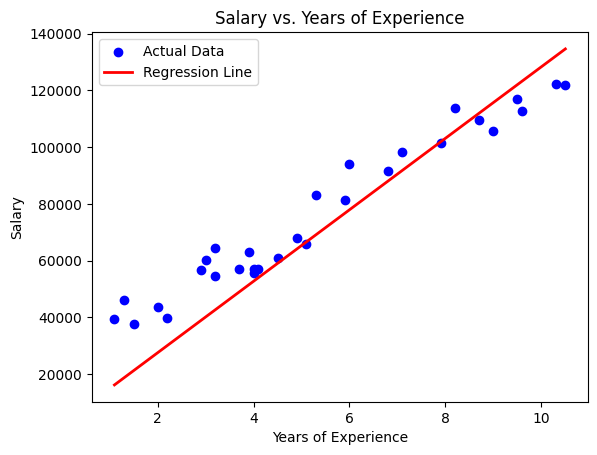


Final MSE: 153302827.9773448



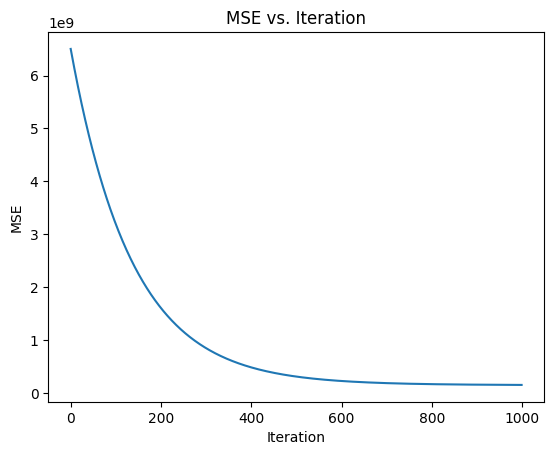

In [ ]:
# I programmed simple linear regression model. predicted the
# salary for a given Year of Experience. Plotted the scatterplot for the given data and the predicted
# curve. Plotted MSE vs iteration curve and print final value of MSE.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define a function for linear regression
def perform_linear_regression(features, target, learning_rate, num_iterations):
    num_samples, num_features = features.shape
    weights = np.zeros(num_features)
    bias = 0

    mse_values = []

    # Gradient descent for num_iterations
    for iteration in range(num_iterations):
        predictions = np.dot(features, weights) + bias

        gradient_weights = (1/num_samples) * np.dot(features.T, (predictions - target))
        gradient_bias = (1/num_samples) * np.sum(predictions - target)

        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        mse = np.mean((target - predictions) ** 2)
        mse_values.append(mse)

    return weights, bias, mse_values

# Load the dataset
salary_data = pd.read_csv('Salary_Data.csv')

years_of_experience = salary_data['YearsExperience'].values.reshape(-1, 1)
salary = salary_data['Salary'].values

learning_rate = 0.0001
num_iterations = 1000

# Perform linear regression
final_weights, final_bias, final_mse_values = perform_linear_regression(years_of_experience, salary, learning_rate, num_iterations)

# Scatter plot of the data
plt.scatter(years_of_experience, salary, color='blue', label='Actual Data')

salary_predictions = np.dot(years_of_experience, final_weights) + final_bias
plt.plot(years_of_experience, salary_predictions, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.title('Salary vs. Years of Experience')

plt.show()

# Calculate and print the Mean Squared Error (MSE)
final_mse = final_mse_values[-1]
print(f'\nFinal MSE: {final_mse}\n')

# Plot the MSE vs. iteration curve
plt.plot(range(num_iterations), final_mse_values)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs. Iteration')
plt.show()


Question 2

Final MSE: 3429356417285.773


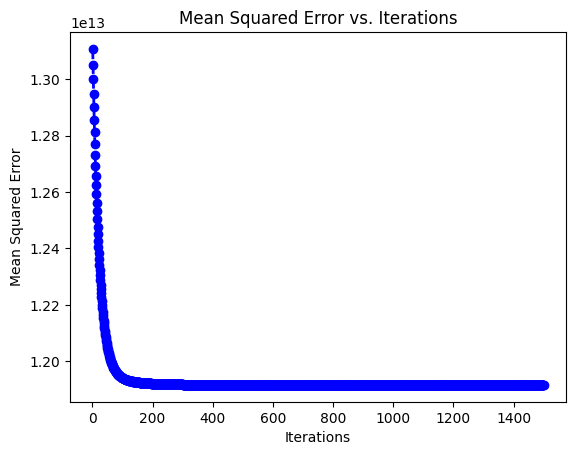

In [ ]:
# Using the given dataset to generate a multi-variant linear regression model for predicting the pricing of the houses based on other features.
# Also I have applied normalization where it is needed for better performance. Plotted MSE vs iteration curve and printed final value of MSE.



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LoadING dataset
data = pd.read_csv('Housing.csv')

# Extract features

X = data.drop(columns=['price'])
y = data['price']

#  'yes', 'no' columns to binary
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
X[binary_columns] = X[binary_columns].replace({'yes': 1, 'no': 0})

# categorical column to numerical
X = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True)

# Feature scaling - Standardization
mean_X = np.mean(X, axis=0)
std_X = np.std(X, axis=0)
X = (X - mean_X) / std_X


# Function to perform gradient descent
def gradient_descent_multi(X, y, theta, alpha, iterations):
    m = len(y)  #

    mse_history = []

    for _ in range(iterations):
        # Hypothesis function
        h = np.dot(X, theta)

        # prediction error
        error = h - y

        # Computation of the gradients
        gradient = np.dot(X.T, error) / m

        # Update parameters using gradient descent
        theta = theta - alpha * gradient

        # Compute Mean Squared Error
        mse = np.sum(error**2) / (2 * m)
        mse_history.append(mse)

    return theta, mse_history

#  hyperparameters
alpha =  0.01
iterations = 1500

theta_initial = np.zeros(X.shape[1])

# Calling gradient descent function
theta_final, mse_history = gradient_descent_multi(X, y, theta_initial, alpha, iterations)

final_mse = mse_values[-1]
print(f'Final MSE: {final_mse}')

# Plotting
plt.plot(range(1, iterations+1), mse_history, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.title('Mean Squared Error vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()




Question 3

Tau = 0.1:
LWLR - MSE: 555.7802573432397
SLR - MSE: 77.34399178518456

Tau = 1.0:
LWLR - MSE: 197.10335245724704
SLR - MSE: 77.34399178518456

Tau = 10.0:
LWLR - MSE: 56.35900356973145
SLR - MSE: 77.34399178518456



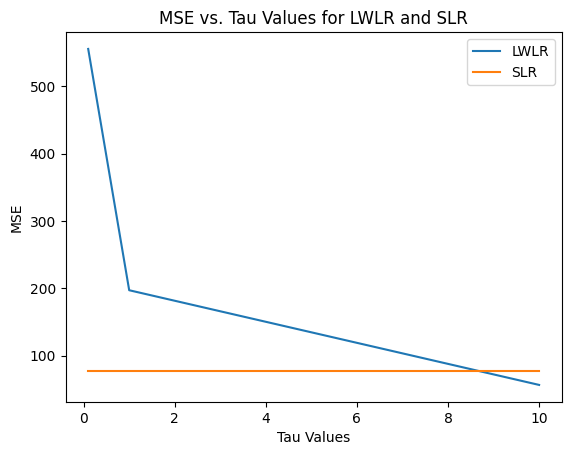

In [ ]:
#   From scratch demonstrated locally weighted linear regression using the dataset realEstate.csv , regulated for different weight parameters.
# Computed performance metrics.Compare and plot MSE values obtained using weighted linear regression with those of simple linear regression.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


data = pd.read_csv('realEstate.csv')


X = data[['X3 distance to the nearest MRT station']].values
y = data['Y house price of unit area'].values

# Function to add a bias term to X
def add_bias(X):
    return np.column_stack((np.ones(len(X)), X))

# Locally Weighted Linear Regression (LWLR)
def locally_weighted_linear_regression(X, y, query_point, tau, lambda_=1e-5):
    m, n = X.shape
    weights = np.exp(-np.sum((X - query_point) ** 2, axis=1) / (2 * tau ** 2))
    weights_diag = np.diag(weights)
    X_weighted = X.T @ weights_diag @ X + lambda_ * np.identity(n)
    theta = np.linalg.inv(X_weighted) @ X.T @ weights_diag @ y
    return query_point @ theta

# Simple Linear Regression (SLR)
def simple_linear_regression(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# Computed MSE for a given set of predictions and true values
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term to features
X_train_bias = add_bias(X_train)
X_test_bias = add_bias(X_test)

# Set hyperparameters
tau_values = [0.1, 1.0, 10.0]

# Perform LWLR and SLR for different tau values and calculate MSE values
mse_values_lwlr = []
mse_values_slr = []

for tau in tau_values:
    y_pred_lwlr = [locally_weighted_linear_regression(X_train_bias, y_train, x, tau) for x in X_test_bias]
    mse_lwlr = mean_squared_error(y_test, y_pred_lwlr)
    mse_values_lwlr.append(mse_lwlr)

    weights_slr = simple_linear_regression(X_train_bias, y_train)
    y_pred_slr = X_test_bias @ weights_slr
    mse_slr = mean_squared_error(y_test, y_pred_slr)
    mse_values_slr.append(mse_slr)

# Print and compare MSE values for both SLR and LWLR
for i, tau in enumerate(tau_values):
    print(f'Tau = {tau}:')
    print(f'LWLR - MSE: {mse_values_lwlr[i]}')
    print(f'SLR - MSE: {mse_values_slr[i]}')
    print()

# Plot and compare the MSE values
plt.plot(tau_values, mse_values_lwlr, label='LWLR')
plt.plot(tau_values, mse_values_slr, label='SLR')
plt.xlabel('Tau Values')
plt.ylabel('MSE')
plt.title('MSE vs. Tau Values for LWLR and SLR')
plt.legend()
plt.show()



Question 4

In [ ]:
# demonstrate binary classification by logistic regression using the
# dataset spamEmail.csv. Plot the cost function values vs number of iteration, and the confusion
# matrix. Compute all relevant performance metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('spamEmail.csv')

# Extract features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Function to add a bias term to X
def add_bias(X):
    return np.column_stack((np.ones(len(X)), X))

# Sigmoid function (logistic function)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(y, y_pred):
    m = len(y)
    cost = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Gradient descent
def gradient_descent(X, y, alpha, num_iterations):
    m, n = X.shape
    X = add_bias(X)

    theta = np.zeros(n + 1)
    cost_history = []

    for i in range(num_iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(y, y_pred)
        cost_history.append(cost)

    return theta, cost_history

# Predict binary classes
def predict(X, theta, threshold=0.5):
    X_bias = add_bias(X)
    probabilities = sigmoid(np.dot(X_bias, theta))
    return (probabilities >= threshold).astype(int)

# Split the dataset into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Set hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Train the logistic regression model
theta, cost_history = gradient_descent(X_train, y_train, learning_rate, num_iterations)

# Plot the cost function vs. number of iterations
plt.plot(range(1, num_iterations + 1), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Number of Iterations')
plt.show()

# Make predictions on the test set
y_pred = predict(X_test, theta)

# Confusion Matrix
confusion_matrix = np.zeros((2, 2))
for true_label, pred_label in zip(y_test, y_pred):
    confusion_matrix[true_label, pred_label] += 1

# Performance Metrics
tp, tn, fp, fn = confusion_matrix[1, 1], confusion_matrix[0, 0], confusion_matrix[0, 1], confusion_matrix[1, 0]

accuracy = (tp + tn) / np.sum(confusion_matrix)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0.0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0.0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0.0

# Print the confusion matrix and performance metrics
print(f'Confusion Matrix:\n{confusion_matrix}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')


TypeError: ignored

Question 5

In [ ]:
#  program to train a multi class classification model using stochastic gradient descent and
# Newton’s method. Use the dataset mnist1.csv. Ploted all graphs for varying parameters.
# Commented about the convergence rate.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('mnist1.csv')

# Extract features (X) and labels (y)
X = data.iloc[:, 1:].values / 255.0
y = data.iloc[:, 0].values

# Split the dataset into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Function to add a bias term to X
def add_bias(X):
    return np.column_stack((np.ones(len(X)), X))

# One-hot encoding
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression cost function for multi-class
def cost_function(X, Y, Theta):
    m = len(Y)
    h = sigmoid(X.dot(Theta))
    J = -(1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
    return J

# Function to perform stochastic gradient descent for multi-class logistic regression
def stochastic_gradient_descent(X, Y, Theta, alpha, epochs):
    m = len(Y)
    cost_history = []

    for epoch in range(epochs):
        for i in range(m):
            xi = X[i, :].reshape(1, -1)
            yi = Y[i, :]

            h = sigmoid(xi.dot(Theta))
            gradient = xi.T.dot(h - yi)
            Theta -= alpha * gradient

        cost = cost_function(X, Y, Theta)
        cost_history.append(cost)

    return Theta, cost_history

# Function to perform Newton's method for multi-class logistic regression
def newtons_method(X, Y, Theta, epochs):
    m = len(Y)
    cost_history = []

    for epoch in range(epochs):
        h = sigmoid(X.dot(Theta))
        gradient = X.T.dot(h - Y) / m
        hessian = (X.T.dot(np.diag(h * (1 - h))).dot(X)) / m

        Theta -= np.linalg.inv(hessian).dot(gradient)

        cost = cost_function(X, Y, Theta)
        cost_history.append(cost)

    return Theta, cost_history

# Add bias term to features
X_train_bias = add_bias(X_train)
X_test_bias = add_bias(X_test)

# One-hot encode labels
num_classes = len(np.unique(y))
y_train_onehot = one_hot_encode(y_train, num_classes)
y_test_onehot = one_hot_encode(y_test, num_classes)

# Set hyperparameters
alpha = 0.01
epochs = 5

# Initialize parameters
Theta_initial = np.zeros((X_train_bias.shape[1], num_classes))

# Train using stochastic gradient descent
Theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_train_bias, y_train_onehot, Theta_initial, alpha, epochs)

# Train using Newton's method
Theta_newton, cost_history_newton = newtons_method(X_train_bias, y_train_onehot, Theta_initial, epochs)

# Plot
plt.plot(range(1, epochs + 1), cost_history_sgd, label='SGD')
plt.plot(range(1, epochs + 1), cost_history_newton, label='Newton')
plt.title('Cost Function vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost Function Value')
plt.legend()
plt.show()

# SGD typically converges faster per epoch, but the number of epochs required can be high.
#  Newton's method converges faster per iteration but may be computationally expensive.
#  The choice is between computational cost and convergence speed.


ValueError: ignored